
# پروژه پنجم - فاز دوم - بررسی برخی از مسائل شبکه های عصبی به کمک Tensorflow
## نازنین یوسفیان
### 810197610
  

<div style="direction:rtl">
## مقدمه
### در این پروژه از رابط keras  و کتابخانه tensorflow برای پیاده سازی شبکه عصبی استفاده می کنیم. پارامتر ها و تاثیر هرکدام را بر شبکه بررسی می کنیم و سعی می کنیم به مدلی بهینه برسیم.
    </div>

<div style="direction:rtl">
## 1. خواندن داده ها
    </div>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp "/content/drive/MyDrive/xray.zip" .

In [5]:
!unzip xray.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/train/COVID19/COVID19(228).jpg  
  inflating: Data/train/COVID19/COVID19(229).jpg  
  inflating: Data/train/COVID19/COVID19(23).jpg  
  inflating: Data/train/COVID19/COVID19(230).jpg  
  inflating: Data/train/COVID19/COVID19(231).jpg  
  inflating: Data/train/COVID19/COVID19(232).jpg  
  inflating: Data/train/COVID19/COVID19(233).jpg  
  inflating: Data/train/COVID19/COVID19(234).jpg  
  inflating: Data/train/COVID19/COVID19(235).jpg  
  inflating: Data/train/COVID19/COVID19(236).jpg  
  inflating: Data/train/COVID19/COVID19(237).jpg  
  inflating: Data/train/COVID19/COVID19(238).jpg  
  inflating: Data/train/COVID19/COVID19(239).jpg  
  inflating: Data/train/COVID19/COVID19(24).jpg  
  inflating: Data/train/COVID19/COVID19(240).jpg  
  inflating: Data/train/COVID19/COVID19(241).jpg  
  inflating: Data/train/COVID19/COVID19(242).jpg  
  inflating: Data/train/COVID19/COVID19(243).jpg  
  inflating: Data/train/COVID19/C

In [6]:
from tensorflow.keras import *
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
dataGenerator = preprocessing.image.ImageDataGenerator()

In [ ]:
train = dataGenerator.flow_from_directory(
    "/content/Data/train", 
    target_size=(80,80), 
    color_mode='grayscale', 
    batch_size=32)

Found 5144 images belonging to 3 classes.


In [ ]:
test = dataGenerator.flow_from_directory(
    "/content/Data/test", 
    target_size=(80,80), 
    color_mode='grayscale', 
    batch_size=32)

Found 1288 images belonging to 3 classes.


<div style="direction:rtl">
## 2. چاپ اطلاعاتی از هر دسته
    </div>

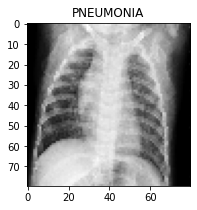

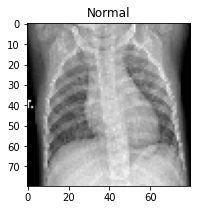

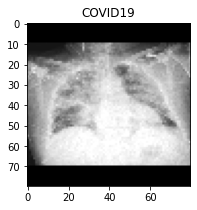

In [ ]:

labels = {0: 'COVID19', 1:'Normal', 2:'PNEUMONIA'}
batch_img, batch_label = train.next()
seen = set()
for img, label in zip(batch_img, batch_label):
  l = backend.argmax(label).numpy()
  if l not in seen:
    seen.add(l)
    plt.figure(figsize=(3, 3))
    plt.title(labels[l])
    plt.imshow(img.reshape(80,80), cmap=plt.get_cmap('gray'))
    plt.show()


<BarContainer object of 3 artists>

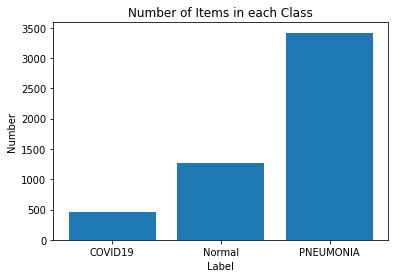

In [ ]:
num = train.num_classes
count = [0] * num
for label in train.classes:
  count[label] += 1
x = [labels[i] for i in range(num)]
y = [count[i] for i in range(num)]
plt.title('Number of Items in each Class')
plt.xlabel('Label')
plt.ylabel('Number')
plt.bar(x, y)



In [7]:
def result(test):
  labels = []
  batches = int(np.ceil(len(test.classes) / test.batch_size))
  for i in range(batches):
    item, label = test.next()
    for l in label:
      labels.append(backend.argmax(l))
  y_true = np.array(labels)
  y_pred = backend.argmax(model.predict(test)).numpy()
  print(classification_report(y_true, y_pred))

In [8]:
def plot(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()


<div style="direction:rtl">
## 3. ساخت شبکه عصبی
### با استفاده از تابع *summary* می توانیم اطلاعات مربوط به هر لایه را مشاهده کنیم. به ازای هر لایه ای که تعریف کرده ایم، نام و نوع آن را چاپ می کند. هم چنین در هر لایه شکل خروجی را مشخص می کند که به عنوان ورودی لایه بعدی استفاده می شود. *param* تعداد پارمتر هایی که در هر لایه اموزش داده می شوند را مشخص می کند که برای لایه های *Dense* این مقدار برابر است با تعداد خروجی * (تعداد ورودی + 1 ).
### به طور مثال برای لایه *dense_6* داریم: 1024 * (6400 + 1) = 6554624
### در لایه *flatten* یادگیری صورت نمی پذیرد و فقط شکل داده های ورودی را مسطح می کند به همین علت خروجی آن برابر با 80 * 80 = 6400 است.
### در انتها جمع تمام پارامترهای لایه ها نشان داده می شود.
    </div>

In [ ]:
inp = layers.Input(shape = (80, 80, 1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dense(3, activation='softmax')(out)
model = models.Model(inputs=inp, outputs=out)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss = "categorical_crossentropy", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              6554624   
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 3075      
Total params: 7,607,299
Trainable params: 7,607,299
Non-trainable params: 0
_________________________________________________________________


<div style="direction:rtl">
## 4. مقایسه tanh و relu
### با استفاده از هر دو activation function می بینیم که فرآیند یادگیری صورت نمی گیرد و با گذشت چندین epoch نیز accuracy افزایش نمی یابد. 
### در اینجا چون داده ها را نرمالایز نکردیم، هر پیکسل اعداد بزرگی دارد که با استفاده از تابع relu این مقادیر بیشتر شده (چون در وزن متناظرشان ضرب می شوند و جمع می شوند و در نهایت این عدد افزایش می یابد)، overflow رخ می دهد و مقدار loss قابل محاسبه نیست و نمی توان از آن برای یادگیری استفاده کرد. به همین دلیل دقت بسیار پایین است.
### در تابع tanh به این صورت عمل می کند که ورودی را به عددی بین منفی یک و یک نگاشت می کند. این باعث می شود که اعداد با مقادیر بزرگ یا کوچک تاثیری در یادگیری نداشته باشند و در واقع با مشکل vanishing gradient روبرو می شویم.
### راه حل این است که داده ها را نرمالایز کنیم تا هم از overflow در relu جلوگیری شود و هم گرادیان در tanh تاثیرگذار باشد.
    </div>

In [ ]:
history = model.fit(train, validation_data=test, epochs=10)

Epoch 1/10
161/161 [==============================] - 148s 921ms/step - loss: nan - accuracy: 0.1757 - val_loss: nan - val_accuracy: 0.0901
Epoch 2/10
161/161 [==============================] - 149s 924ms/step - loss: nan - accuracy: 0.0858 - val_loss: nan - val_accuracy: 0.0901
Epoch 3/10
161/161 [==============================] - 146s 911ms/step - loss: nan - accuracy: 0.0928 - val_loss: nan - val_accuracy: 0.0901
Epoch 4/10
161/161 [==============================] - 146s 907ms/step - loss: nan - accuracy: 0.0861 - val_loss: nan - val_accuracy: 0.0901
Epoch 5/10
161/161 [==============================] - 146s 906ms/step - loss: nan - accuracy: 0.0870 - val_loss: nan - val_accuracy: 0.0901
Epoch 6/10
161/161 [==============================] - 146s 909ms/step - loss: nan - accuracy: 0.0879 - val_loss: nan - val_accuracy: 0.0901
Epoch 7/10
161/161 [==============================] - 147s 913ms/step - loss: nan - accuracy: 0.0887 - val_loss: nan - val_accuracy: 0.0901
Epoch 8/10
161/161 [

In [ ]:
result(test)

              precision    recall  f1-score   support

           0       0.09      1.00      0.17       116
           1       0.00      0.00      0.00       317
           2       0.00      0.00      0.00       855

    accuracy                           0.09      1288
   macro avg       0.03      0.33      0.06      1288
weighted avg       0.01      0.09      0.01      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


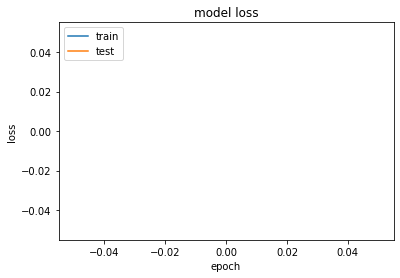

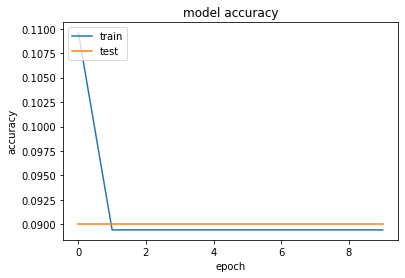

In [ ]:
plot(history)

In [ ]:
inp = layers.Input(shape = (80, 80, 1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation='tanh')(out)
out = layers.Dense(1024, activation='tanh')(out)
out = layers.Dense(3, activation='softmax')(out)
model = models.Model(inputs=inp, outputs=out)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss = "categorical_crossentropy", metrics=['accuracy'])

In [ ]:
history = model.fit(train, validation_data=test, epochs=10)

Epoch 1/10
161/161 [==============================] - 146s 905ms/step - loss: 1.0086 - accuracy: 0.5968 - val_loss: 0.8353 - val_accuracy: 0.6638
Epoch 2/10
161/161 [==============================] - 143s 893ms/step - loss: 0.9343 - accuracy: 0.6166 - val_loss: 1.0677 - val_accuracy: 0.6638
Epoch 3/10
161/161 [==============================] - 144s 897ms/step - loss: 0.9065 - accuracy: 0.6238 - val_loss: 0.8727 - val_accuracy: 0.6638
Epoch 4/10
161/161 [==============================] - 144s 899ms/step - loss: 0.8897 - accuracy: 0.6452 - val_loss: 0.8394 - val_accuracy: 0.6638
Epoch 5/10
161/161 [==============================] - 145s 900ms/step - loss: 0.8884 - accuracy: 0.6476 - val_loss: 0.8496 - val_accuracy: 0.6638
Epoch 6/10
161/161 [==============================] - 144s 898ms/step - loss: 0.8707 - accuracy: 0.6409 - val_loss: 0.8471 - val_accuracy: 0.6638
Epoch 7/10
161/161 [==============================] - 144s 896ms/step - loss: 0.8799 - accuracy: 0.6596 - val_loss: 0.8368 -

In [ ]:
result(test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.00      0.00      0.00       317
           2       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


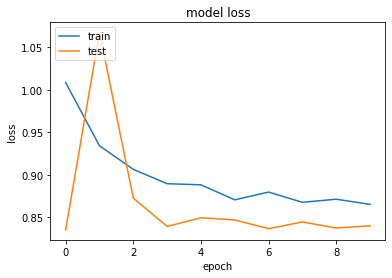

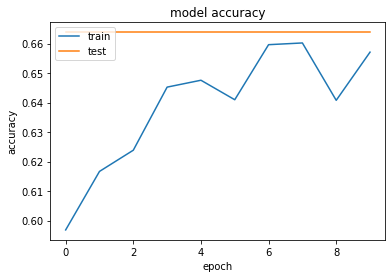

In [ ]:
plot(history)

<div style="direction:rtl">
## 5. نرمال کردن داده ها و ساخت شبکه عصبی بهینه
### با تست چند شبکه عصبی مختلف به یک مدل بهینه که سومین مدل است می رسیم و از این به بعد از آن برای بررسی بقیه پارامترها استفاده می کنیم.
    </div>

In [9]:
dataGenerator = preprocessing.image.ImageDataGenerator(rescale = 1/255.0)
train = dataGenerator.flow_from_directory(
    "/content/Data/train", 
    target_size=(80,80), 
    color_mode='grayscale', 
    batch_size=32)
test = dataGenerator.flow_from_directory(
    "/content/Data/test", 
    target_size=(80,80), 
    color_mode='grayscale', 
    batch_size=32)


Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
inp = layers.Input(shape = (80, 80, 1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dense(3, activation='softmax')(out)
model = models.Model(inputs=inp, outputs=out)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss = "categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train, validation_data=test, epochs=10)

Epoch 1/10
161/161 [==============================] - 153s 953ms/step - loss: 0.6889 - accuracy: 0.7087 - val_loss: 0.2985 - val_accuracy: 0.8967
Epoch 2/10
161/161 [==============================] - 150s 932ms/step - loss: 0.3673 - accuracy: 0.8596 - val_loss: 0.4062 - val_accuracy: 0.8222
Epoch 3/10
161/161 [==============================] - 145s 904ms/step - loss: 0.3809 - accuracy: 0.8506 - val_loss: 0.2354 - val_accuracy: 0.9208
Epoch 4/10
161/161 [==============================] - 145s 903ms/step - loss: 0.2634 - accuracy: 0.9041 - val_loss: 0.2134 - val_accuracy: 0.9177
Epoch 5/10
161/161 [==============================] - 143s 891ms/step - loss: 0.2847 - accuracy: 0.8853 - val_loss: 0.2068 - val_accuracy: 0.9239
Epoch 6/10
161/161 [==============================] - 144s 893ms/step - loss: 0.2590 - accuracy: 0.9000 - val_loss: 0.2027 - val_accuracy: 0.9193
Epoch 7/10
161/161 [==============================] - 150s 933ms/step - loss: 0.2638 - accuracy: 0.8990 - val_loss: 0.2094 -

In [ ]:
result(test)

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       116
           1       0.93      0.87      0.90       317
           2       0.94      0.98      0.96       855

    accuracy                           0.94      1288
   macro avg       0.95      0.90      0.92      1288
weighted avg       0.94      0.94      0.94      1288



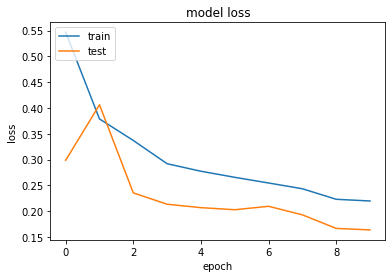

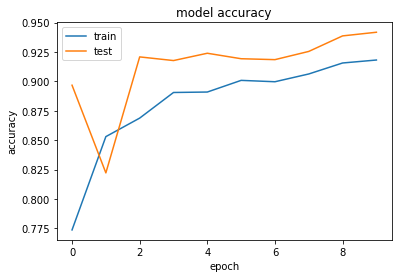

In [ ]:
plot(history)

In [ ]:
inp = layers.Input(shape = (80, 80, 1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dense(2048, activation='relu')(out)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dense(3, activation='softmax')(out)
model = models.Model(inputs=inp, outputs=out)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss = "categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train, validation_data=test, epochs=10)

Epoch 1/10
161/161 [==============================] - 153s 952ms/step - loss: 0.6632 - accuracy: 0.7287 - val_loss: 0.3288 - val_accuracy: 0.9107
Epoch 2/10
161/161 [==============================] - 146s 911ms/step - loss: 0.3956 - accuracy: 0.8484 - val_loss: 0.5652 - val_accuracy: 0.7430
Epoch 3/10
161/161 [==============================] - 149s 930ms/step - loss: 0.3880 - accuracy: 0.8381 - val_loss: 0.2075 - val_accuracy: 0.9239
Epoch 4/10
161/161 [==============================] - 145s 898ms/step - loss: 0.3197 - accuracy: 0.8782 - val_loss: 0.2681 - val_accuracy: 0.8991
Epoch 5/10
161/161 [==============================] - 145s 899ms/step - loss: 0.2659 - accuracy: 0.8965 - val_loss: 0.4544 - val_accuracy: 0.8245
Epoch 6/10
161/161 [==============================] - 150s 936ms/step - loss: 0.2708 - accuracy: 0.8973 - val_loss: 0.1849 - val_accuracy: 0.9433
Epoch 7/10
161/161 [==============================] - 145s 902ms/step - loss: 0.2468 - accuracy: 0.9077 - val_loss: 0.1935 -

In [ ]:
result(test)

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       116
           1       0.94      0.83      0.88       317
           2       0.93      0.98      0.95       855

    accuracy                           0.93      1288
   macro avg       0.95      0.89      0.92      1288
weighted avg       0.93      0.93      0.93      1288



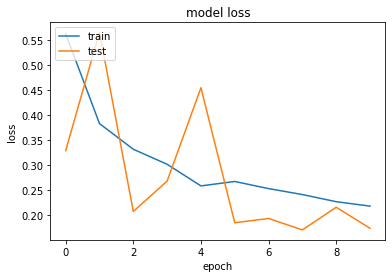

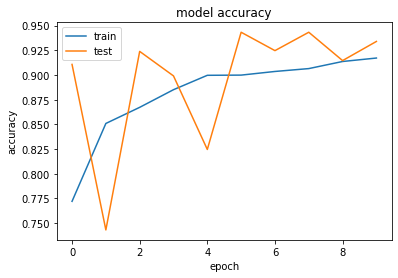

In [ ]:
plot(history)

In [14]:
inp = layers.Input(shape = (80, 80, 1))
out = layers.Flatten()(inp)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(3, activation='softmax')(out)
model = models.Model(inputs=inp, outputs=out)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss = "categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train, validation_data=test, epochs=10)

Epoch 1/10
161/161 [==============================] - 148s 921ms/step - loss: 0.6942 - accuracy: 0.6889 - val_loss: 0.3547 - val_accuracy: 0.8579
Epoch 2/10
161/161 [==============================] - 146s 909ms/step - loss: 0.4347 - accuracy: 0.8119 - val_loss: 0.2536 - val_accuracy: 0.9146
Epoch 3/10
161/161 [==============================] - 147s 913ms/step - loss: 0.3523 - accuracy: 0.8640 - val_loss: 0.6100 - val_accuracy: 0.6801
Epoch 4/10
161/161 [==============================] - 146s 907ms/step - loss: 0.3221 - accuracy: 0.8626 - val_loss: 0.2670 - val_accuracy: 0.8921
Epoch 5/10
161/161 [==============================] - 146s 908ms/step - loss: 0.3095 - accuracy: 0.8848 - val_loss: 0.1917 - val_accuracy: 0.9247
Epoch 6/10
161/161 [==============================] - 146s 908ms/step - loss: 0.2714 - accuracy: 0.8972 - val_loss: 0.3298 - val_accuracy: 0.8665
Epoch 7/10
161/161 [==============================] - 146s 908ms/step - loss: 0.2687 - accuracy: 0.8932 - val_loss: 0.2237 -

In [15]:
result(test)

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       116
           1       0.91      0.88      0.90       317
           2       0.95      0.97      0.96       855

    accuracy                           0.94      1288
   macro avg       0.95      0.91      0.93      1288
weighted avg       0.94      0.94      0.94      1288



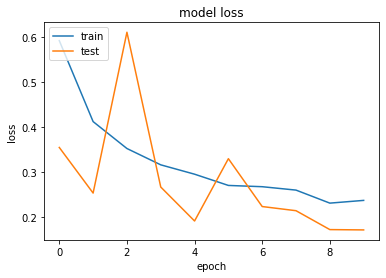

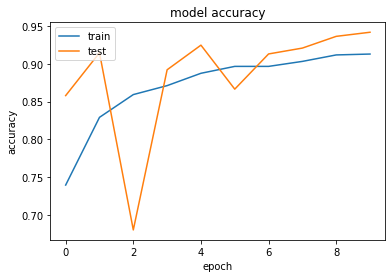

In [16]:
plot(history)


## 6. بررسی optimizer ها
### در شبکه های عصبی از gradient descent استفاده می کنیم تا خطا را به کمتیرین میزان ممکن برسانیم و در واقع به مینیمم کلی برسیم. در مدل کردن ممکن حالتی پیش بیاید که به جای رسیدن به مینیمم کلی در مینیمم محلی گیر کنیم و نتوانیم به حداقلی که مدنظر است برسیم. در اینجا از momentum استفاده می کنیم که عددی بین 0 و 1 است که  سایز قدم هایی است که برای رسیدن به مینمم برمی داریم را افزایش می دهد و اینگونه می توانیم از مینیمم محلی اجتناب کنیم.
### در حالتی که momentum عدد بزرگی است، learning rate باید کوچک انتخاب شود. هنگامی که momentum بزرگ باشد، همگرایی زودتر اتفاق می افتد. اگر هر دو مقدار momentum و learning rate زیاد باشند، ممکن است الگوریتم از مینیمم موردنظر عبور کند (چون قدم های بزرگی بر میدارد)
### همانطور که در نتایج به دست آمده نیز مشخص است، با استفاده از momentum سریع تر می توانیم به دقت مورد نظر برسیم و به تعداد ایپاک های کمتری لازم است. نکته قابل توجه اینجاست که پس از رسیدن به حالت بهینه با ادامه دادن فرآیند آموزش overfitting زیادی را مشاهده می کنیم و هر چه مقدار momentum بیشتر باشد، این overfitting زودتر اتفاق می افتد.


In [17]:
inp = layers.Input(shape = (80, 80, 1))
out = layers.Flatten()(inp)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(3, activation='softmax')(out)
model = models.Model(inputs=inp, outputs=out)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.5), loss = "categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train, validation_data=test, epochs=10)

Epoch 1/10
161/161 [==============================] - 144s 891ms/step - loss: 0.6199 - accuracy: 0.7384 - val_loss: 0.3195 - val_accuracy: 0.8742
Epoch 2/10
161/161 [==============================] - 143s 891ms/step - loss: 0.3881 - accuracy: 0.8465 - val_loss: 0.2319 - val_accuracy: 0.9068
Epoch 3/10
161/161 [==============================] - 143s 887ms/step - loss: 0.2944 - accuracy: 0.8825 - val_loss: 0.2460 - val_accuracy: 0.9061
Epoch 4/10
161/161 [==============================] - 143s 891ms/step - loss: 0.2864 - accuracy: 0.8859 - val_loss: 0.2271 - val_accuracy: 0.9099
Epoch 5/10
161/161 [==============================] - 143s 886ms/step - loss: 0.2574 - accuracy: 0.9006 - val_loss: 0.1855 - val_accuracy: 0.9332
Epoch 6/10
161/161 [==============================] - 143s 890ms/step - loss: 0.2799 - accuracy: 0.9011 - val_loss: 0.2026 - val_accuracy: 0.9262
Epoch 7/10
161/161 [==============================] - 143s 889ms/step - loss: 0.2562 - accuracy: 0.9020 - val_loss: 0.1930 -

In [18]:
result(test)

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       116
           1       0.96      0.48      0.64       317
           2       0.83      1.00      0.90       855

    accuracy                           0.85      1288
   macro avg       0.93      0.77      0.82      1288
weighted avg       0.87      0.85      0.84      1288



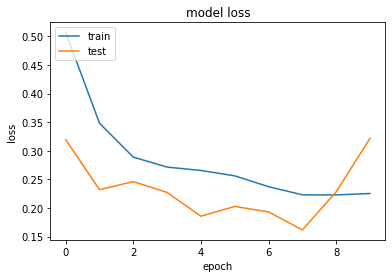

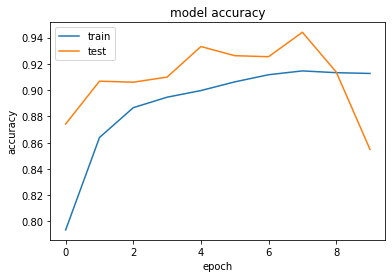

In [19]:
plot(history)

In [20]:
inp = layers.Input(shape = (80, 80, 1))
out = layers.Flatten()(inp)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(3, activation='softmax')(out)
model = models.Model(inputs=inp, outputs=out)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9), loss = "categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train, validation_data=test, epochs=10)

Epoch 1/10
161/161 [==============================] - 145s 896ms/step - loss: 0.6737 - accuracy: 0.6850 - val_loss: 0.3404 - val_accuracy: 0.9208
Epoch 2/10
161/161 [==============================] - 143s 888ms/step - loss: 0.3623 - accuracy: 0.8571 - val_loss: 0.2588 - val_accuracy: 0.9185
Epoch 3/10
161/161 [==============================] - 143s 892ms/step - loss: 0.2762 - accuracy: 0.9031 - val_loss: 0.1828 - val_accuracy: 0.9332
Epoch 4/10
161/161 [==============================] - 144s 897ms/step - loss: 0.2895 - accuracy: 0.8840 - val_loss: 0.1726 - val_accuracy: 0.9379
Epoch 5/10
161/161 [==============================] - 146s 907ms/step - loss: 0.2593 - accuracy: 0.9020 - val_loss: 0.2089 - val_accuracy: 0.9425
Epoch 6/10
161/161 [==============================] - 145s 902ms/step - loss: 0.2406 - accuracy: 0.9090 - val_loss: 0.2753 - val_accuracy: 0.8991
Epoch 7/10
161/161 [==============================] - 144s 897ms/step - loss: 0.2492 - accuracy: 0.9113 - val_loss: 0.2477 -

In [21]:
result(test)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       116
           1       0.96      0.78      0.86       317
           2       0.92      0.99      0.95       855

    accuracy                           0.93      1288
   macro avg       0.94      0.89      0.91      1288
weighted avg       0.93      0.93      0.92      1288



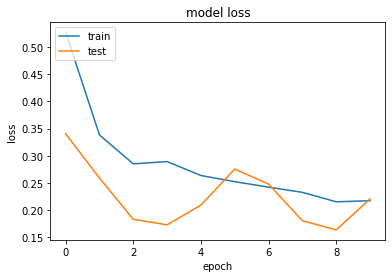

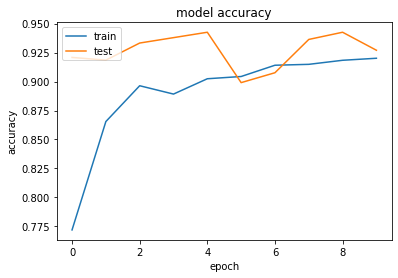

In [22]:
plot(history)

In [23]:
inp = layers.Input(shape = (80, 80, 1))
out = layers.Flatten()(inp)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(3, activation='softmax')(out)
model = models.Model(inputs=inp, outputs=out)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.99), loss = "categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train, validation_data=test, epochs=10)

Epoch 1/10
161/161 [==============================] - 145s 899ms/step - loss: 0.7500 - accuracy: 0.6834 - val_loss: 0.3785 - val_accuracy: 0.8929
Epoch 2/10
161/161 [==============================] - 148s 920ms/step - loss: 0.4228 - accuracy: 0.8590 - val_loss: 0.3971 - val_accuracy: 0.8106
Epoch 3/10
161/161 [==============================] - 145s 899ms/step - loss: 0.6452 - accuracy: 0.7226 - val_loss: 0.6909 - val_accuracy: 0.6832
Epoch 4/10
161/161 [==============================] - 145s 902ms/step - loss: 0.6959 - accuracy: 0.7178 - val_loss: 0.6435 - val_accuracy: 0.7197
Epoch 5/10
161/161 [==============================] - 144s 894ms/step - loss: 0.6495 - accuracy: 0.7162 - val_loss: 0.6204 - val_accuracy: 0.7492
Epoch 6/10
161/161 [==============================] - 144s 897ms/step - loss: 0.4970 - accuracy: 0.8489 - val_loss: 0.3330 - val_accuracy: 0.9045
Epoch 7/10
161/161 [==============================] - 144s 897ms/step - loss: 0.4898 - accuracy: 0.8381 - val_loss: 0.8534 -

In [24]:
result(test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.00      0.00      0.00       317
           2       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


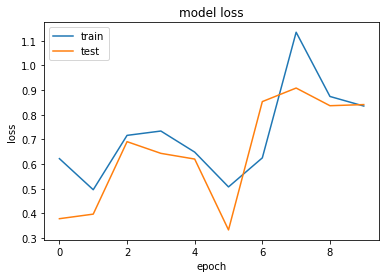

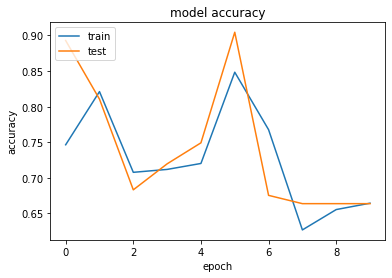

In [25]:
plot(history)


### Adam روشی است که در آن learning rate برای هر پارامتر محاسبه می شود. شبیه به SGD با momentum است. با استفاده از momentum مسیر هموارتری تا رسیدن به نقطه اپتیمم طی می شود  در صورتی که با استفاده از Adam سریع تر به آن می رسیم ولی دقت کمتری نیز دارد.
  

In [26]:
inp = layers.Input(shape = (80, 80, 1))
out = layers.Flatten()(inp)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(3, activation='softmax')(out)
model = models.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam', loss = "categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train, validation_data=test, epochs=10)

Epoch 1/10
161/161 [==============================] - 147s 910ms/step - loss: 0.8954 - accuracy: 0.6877 - val_loss: 0.2438 - val_accuracy: 0.9146
Epoch 2/10
161/161 [==============================] - 145s 904ms/step - loss: 0.3102 - accuracy: 0.8823 - val_loss: 0.3822 - val_accuracy: 0.8455
Epoch 3/10
161/161 [==============================] - 145s 904ms/step - loss: 0.3205 - accuracy: 0.8817 - val_loss: 0.2541 - val_accuracy: 0.9208
Epoch 4/10
161/161 [==============================] - 146s 907ms/step - loss: 0.3219 - accuracy: 0.8770 - val_loss: 0.2030 - val_accuracy: 0.9262
Epoch 5/10
161/161 [==============================] - 146s 907ms/step - loss: 0.2470 - accuracy: 0.9070 - val_loss: 0.3165 - val_accuracy: 0.8595
Epoch 6/10
161/161 [==============================] - 146s 908ms/step - loss: 0.2773 - accuracy: 0.9016 - val_loss: 0.2027 - val_accuracy: 0.9387
Epoch 7/10
161/161 [==============================] - 146s 908ms/step - loss: 0.2609 - accuracy: 0.8973 - val_loss: 0.2470 -

In [27]:
result(test)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       116
           1       0.87      0.93      0.90       317
           2       0.97      0.94      0.96       855

    accuracy                           0.93      1288
   macro avg       0.91      0.92      0.91      1288
weighted avg       0.94      0.93      0.94      1288



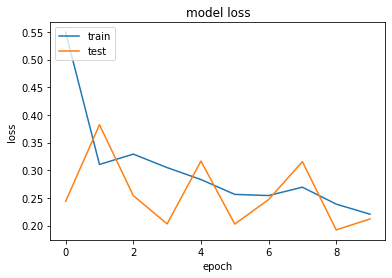

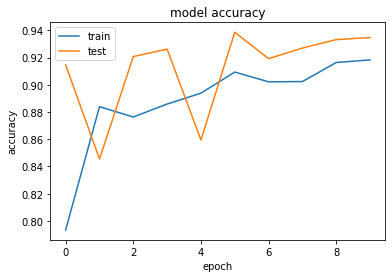

In [28]:
plot(history)

<div style="direction:rtl">
## 7. تاثیر تعداد epoch ها
### در شبکه عصبی پس از هر پیمایش روی batch ها وزن ها آپدیت می شوند تا به حالت بهینه برسیم. پس به همین علت نیاز است که چند بار داده ها به شبکه داده شوند تا وزن ها به عدد درستی برسند و دقت افزایش یابد. اگر فقط از یک epoch استفاده کنیم خیلی محتمل است که underfitting اتفاق بیفتد و به دقت مورد نظر نرسیم.
### اگر از تعداد زیادی epoch استفاده کنیم overfitting اتفاق می افتد. در این حالت شبکه به جای اینکه داده ها را یاد بگیرد، آن ها را حفط می کند و این شامل نویزهایی که در داده ها وجود دارند نیز هست. برای جلوگیری از این اتفاق می توانیم از early stopping استفاده کنیم به این صورت که با توجه به نمودار loss یا accuracy برای داده های تست نقطه ای که از آن بعد loss افزایش یافته یا accuracy کم می شود را پیدا کرده و برای آموزش شبکه از همان تعداد epoch استفاده کنیم. از راه حل های دیگر می توان به اضافه کردن نویز و مثلا استفاده از dropout اشاره کرد.
    </div>

In [32]:
inp = layers.Input(shape = (80, 80, 1))
out = layers.Flatten()(inp)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(3, activation='softmax')(out)
model = models.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam', loss = "categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train, validation_data=test, epochs=20)

Epoch 1/20
161/161 [==============================] - 148s 919ms/step - loss: 0.8584 - accuracy: 0.6903 - val_loss: 0.2388 - val_accuracy: 0.9084
Epoch 2/20
161/161 [==============================] - 147s 917ms/step - loss: 0.3262 - accuracy: 0.8742 - val_loss: 0.2249 - val_accuracy: 0.9270
Epoch 3/20
161/161 [==============================] - 148s 922ms/step - loss: 0.3038 - accuracy: 0.8837 - val_loss: 0.2065 - val_accuracy: 0.9278
Epoch 4/20
161/161 [==============================] - 148s 922ms/step - loss: 0.2979 - accuracy: 0.8857 - val_loss: 0.2386 - val_accuracy: 0.9154
Epoch 5/20
161/161 [==============================] - 151s 937ms/step - loss: 0.2605 - accuracy: 0.9060 - val_loss: 0.1792 - val_accuracy: 0.9317
Epoch 6/20
161/161 [==============================] - 152s 945ms/step - loss: 0.2372 - accuracy: 0.9125 - val_loss: 0.1825 - val_accuracy: 0.9348
Epoch 7/20
161/161 [==============================] - 152s 947ms/step - loss: 0.2645 - accuracy: 0.9064 - val_loss: 0.1722 -

In [33]:
result(test)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       116
           1       0.94      0.88      0.91       317
           2       0.95      0.97      0.96       855

    accuracy                           0.95      1288
   macro avg       0.93      0.93      0.93      1288
weighted avg       0.95      0.95      0.95      1288



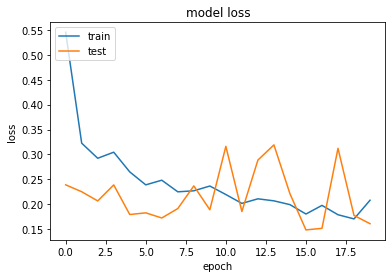

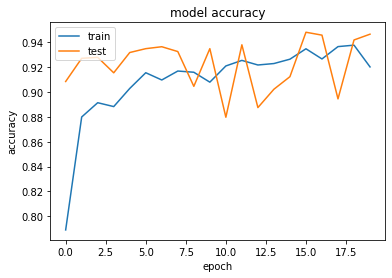

In [34]:
plot(history)

<div style="direction:rtl">
## 8. بررسی loss
### با استفاده از MSE مشاهده می کنیم که یادگیری صورت نمی گیرد و وزن ها به درستی آپدیت نمی شوند و loss مقدار بسیار کمی تغییر می کند. MSE به این صورت عمل می کند که تفاضل لیبلی که به دست آوردیم با لیبلی که در واقعیت هست را محاسبه کرده و به توان 2 می رساند. این تابع نمی تواند انتخاب خوبی باشد. اگر لیبل را به درستی درآورده باشیم مقدار آن صفر خواهد بود. به طور مثال اگر داده مربوط به دسته اول باشد و ما به این نتیجه رسیده باشیم که متعلق به دسته دوم است، مقدار حاصل از MSE  بیشتر از حالتی خواهد بود که آن را متعلق به دسته اول تشخیص داده باشیم که در واقیت این معنی خاصی ندارد و نباید این تفاوت محسوس باشد. از MSE هنگامی که مسئله regression داریم باید استفاده کنیم. در آن حالت فاصله با مقداری که انتظار داریم محاسبه می شود که معقول است ولی برای classification جواب خوبی به ما نمی دهد.
    </div>

In [35]:
inp = layers.Input(shape = (80, 80, 1))
out = layers.Flatten()(inp)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dense(3, activation='softmax')(out)
model = models.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam', loss = "mse", metrics=['accuracy'])
history = model.fit(train, validation_data=test, epochs=20)

Epoch 1/20
161/161 [==============================] - 156s 967ms/step - loss: 0.2211 - accuracy: 0.6509 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 2/20
161/161 [==============================] - 153s 954ms/step - loss: 0.2184 - accuracy: 0.6724 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 3/20
161/161 [==============================] - 150s 931ms/step - loss: 0.2206 - accuracy: 0.6691 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 4/20
161/161 [==============================] - 148s 921ms/step - loss: 0.2256 - accuracy: 0.6616 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 5/20
161/161 [==============================] - 148s 923ms/step - loss: 0.2265 - accuracy: 0.6602 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 6/20
161/161 [==============================] - 147s 917ms/step - loss: 0.2189 - accuracy: 0.6717 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 7/20
161/161 [==============================] - 147s 917ms/step - loss: 0.2229 - accuracy: 0.6657 - val_loss: 0.2241 -

In [36]:
result(test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.00      0.00      0.00       317
           2       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


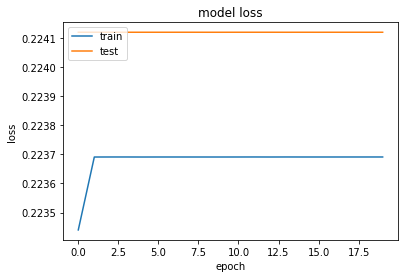

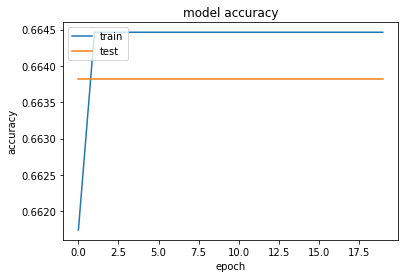

In [37]:
plot(history)


## 9. بررسی regularization
### به طور کل از regularization برای از بین بردن اثرات overfitting و کمتر کردن آن استفاده می شود.
### l2 regularization به این صورت عمل می کند که یک متغیر برای نشان دادن پیچیده بودن مدل استفاده می شود. پس مدلی بهینه تر خواهد بود که علاوه بر خطای کمتر پیچیدگی کمتری نیز داشته باشد و در این صورت احتمال اینکه overfit شده باشد نیز کمتر می شود. اضافه کردن این regularization باعث می شود که وزن ها مقادیر بالایی نگیرند که منجر به overfit شدن شود. همانطور که قابل مشاهده است مدل نوسان زیادی ندارد و overfitting کمتر اتفاق افتاده است
### یک روش دیگر regularization استفاده از dropout  است. در این روش خروجی بعضی از نورون ها درنظر گرفته نمی شوند که در این صورت مانند این است که لایه ای داشته باشیم که تعداد متفاوتی نورون دارد و به طور متفاوتی به لایه قبل متصل شده است. این عمل باعث می شود که عملیات آموزش noisy شود و بر حسب احتمال یک نورون تاثیر بیشتر یا کمتری در خروجی داشته باشد. در اینجا نیز dropout باعث شده که overfitting کمتر اتفاق بیفتد و دقت بیشتری به دست بیاوریم نسبت به حالتی که از آن استفاده نشده ولی نسبت به l2 دقت کمتری دارد.
   

In [10]:
inp = layers.Input(shape = (80, 80, 1))
out = layers.Flatten()(inp)
out = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(l2=0.0001))(out)
out = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(l2=0.0001))(out)
out = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(l2=0.0001))(out)
out = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(l2=0.0001))(out)
out = layers.Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(l2=0.0001))(out)
model = models.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam', loss = "categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train, validation_data=test, epochs=20)

Epoch 1/20
161/161 [==============================] - 162s 997ms/step - loss: 1.2151 - accuracy: 0.6688 - val_loss: 0.4568 - val_accuracy: 0.8727
Epoch 2/20
161/161 [==============================] - 159s 986ms/step - loss: 0.4642 - accuracy: 0.8804 - val_loss: 0.3489 - val_accuracy: 0.9146
Epoch 3/20
161/161 [==============================] - 159s 986ms/step - loss: 0.4159 - accuracy: 0.8843 - val_loss: 0.3782 - val_accuracy: 0.8960
Epoch 4/20
161/161 [==============================] - 159s 989ms/step - loss: 0.3717 - accuracy: 0.8932 - val_loss: 0.3097 - val_accuracy: 0.9092
Epoch 5/20
161/161 [==============================] - 159s 987ms/step - loss: 0.3527 - accuracy: 0.9028 - val_loss: 0.2898 - val_accuracy: 0.9278
Epoch 6/20
161/161 [==============================] - 158s 982ms/step - loss: 0.3370 - accuracy: 0.9008 - val_loss: 0.3201 - val_accuracy: 0.9146
Epoch 7/20
161/161 [==============================] - 157s 978ms/step - loss: 0.3515 - accuracy: 0.8978 - val_loss: 0.2524 -

In [11]:
result(test)

              precision    recall  f1-score   support

           0       0.98      0.82      0.89       116
           1       0.87      0.93      0.90       317
           2       0.97      0.96      0.96       855

    accuracy                           0.94      1288
   macro avg       0.94      0.90      0.92      1288
weighted avg       0.94      0.94      0.94      1288



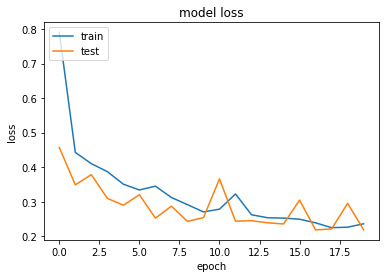

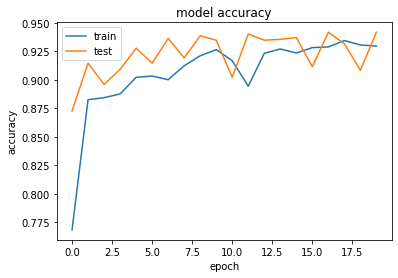

In [12]:
plot(history)

In [13]:
inp = layers.Input(shape = (80, 80, 1))
out = layers.Flatten()(inp)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dropout(0.1)(out)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dropout(0.1)(out)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dropout(0.1)(out)
out = layers.Dense(512, activation='relu')(out)
out = layers.Dropout(0.1)(out)
out = layers.Dense(3, activation='softmax')(out)
model = models.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam', loss = "categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train, validation_data=test, epochs=20)

Epoch 1/20
161/161 [==============================] - 152s 941ms/step - loss: 0.9351 - accuracy: 0.6831 - val_loss: 0.3539 - val_accuracy: 0.8634
Epoch 2/20
161/161 [==============================] - 151s 938ms/step - loss: 0.3571 - accuracy: 0.8653 - val_loss: 0.2681 - val_accuracy: 0.9193
Epoch 3/20
161/161 [==============================] - 153s 949ms/step - loss: 0.3285 - accuracy: 0.8788 - val_loss: 0.2157 - val_accuracy: 0.9270
Epoch 4/20
161/161 [==============================] - 153s 951ms/step - loss: 0.3154 - accuracy: 0.8858 - val_loss: 0.3676 - val_accuracy: 0.8261
Epoch 5/20
161/161 [==============================] - 153s 953ms/step - loss: 0.2968 - accuracy: 0.8971 - val_loss: 0.1873 - val_accuracy: 0.9348
Epoch 6/20
161/161 [==============================] - 154s 960ms/step - loss: 0.2751 - accuracy: 0.8936 - val_loss: 0.2726 - val_accuracy: 0.8898
Epoch 7/20
161/161 [==============================] - 159s 989ms/step - loss: 0.2520 - accuracy: 0.9103 - val_loss: 0.2651 -

In [14]:
result(test)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       116
           1       0.86      0.93      0.89       317
           2       0.97      0.94      0.95       855

    accuracy                           0.94      1288
   macro avg       0.91      0.94      0.92      1288
weighted avg       0.94      0.94      0.94      1288



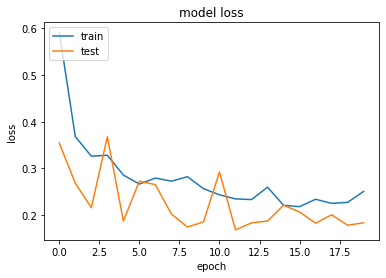

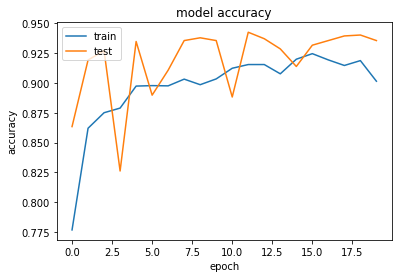

In [15]:
plot(history)

<div style="direction:rtl">
## نتیجه گیری 
### با توجه به activation function هایی که استفاده می کنیم، نرمال سازی داده ها از اهمیت بالایی برخوردار است. نرمال کردن داده ها به فرآیند یادگیری کمک کرده و نتیجه بهتری خواهد داشت هم چنین از overflow نیز جلوگیری کرده و یادگیری زودتر و در تعداد ایپاک های کمتری صورت می گیرد.
### نکته قابل توجه دیگر در شبکه عصبی جلوگیری از overfitting است که با انواع روش های regularization انجام می پذیرد. 
### هم چنین استفاده از optimizer ها روی مدل تاثیرگذار هستند و استفاده از آن ها به دقت بالاتر و سریع تر رسیدن به آن دقت کمک می کند.
    </div>

<div style="direction:rtl">
## منابع
    </div>

1. *https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/*
2. *https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9*
3. *https://towardsdatascience.com/understanding-the-scaling-of-l%C2%B2-regularization-in-the-context-of-neural-networks-e3d25f8b50db*
4. *https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/*